In [2]:
import sys
import os
import ctypes


# Get the absolute path of the utils directory
utils_path = os.path.abspath("lib")
sys.path.append(utils_path)
%load_ext autoreload
%autoreload 2


In [3]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)  # Default is 100
import numpy as np
import qiskit.qpy as qpy
import pickle
import json
import matplotlib.patches as mpatches
from numba import njit
from numba.typed import List
from plotting import *
from readings import *
from tile_process import *

<Figure size 1920x1440 with 0 Axes>

In [4]:
class DrawTilePacking(TilePacker):
    def draw_packing(self, grid, seam_lst, epsilon, intra_color="tomato", inter_color="cyan", edge=False):
        """
        Draws the placement of tiles with color, boundaries, and sets the plot limits 
        to the min_x and max_x of the placed tiles.

        Args:
            grid: The grid containing the tile placement.
            seam_lst: List of seam positions.
            epsilon: Parameter for the plot title.
            intra_color: Color for intra-region tiles.
            inter_color: Color for inter-region tiles.
            edge: Whether to draw tile boundaries.
        """
        # Update font size
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.set_aspect('auto')

        # Initialize variables to track the min_x and max_x of placed tiles
        min_x = float('inf')
        max_x = float('-inf')

        # Draw each tile
        for idx, (tile_x, tile) in enumerate(self.placed_tiles):
            for w, h, dx, dy in tile:
                tile_left = tile_x + dx
                tile_right = tile_left + w

                # Update min_x and max_x based on tile positions
                min_x = min(min_x, tile_left)
                max_x = max(max_x, tile_right)

                # Draw tiles with boundaries
                if edge:
                    rect = patches.Rectangle((tile_left, dy), w, h, facecolor=intra_color, edgecolor="black", linewidth=1)
                else:
                    rect = patches.Rectangle((tile_left, dy), w, h, facecolor=intra_color)

                # Change color for inter-region tiles
                for seam in seam_lst:
                    if dy < seam and dy + h >= seam:
                        if edge:
                            rect = patches.Rectangle((tile_left, dy), w, h, facecolor=inter_color, edgecolor="black", linewidth=1)
                        else:
                            rect = patches.Rectangle((tile_left, dy), w, h, facecolor=inter_color)
                
                ax.add_patch(rect)

        # Set the plot limits based on the min_x and max_x of placed tiles
        margin_x = (max_x - min_x) * 0.05  # Add 5% margin to the width
        margin_y = self.bounding_height * 0.05  # Add 5% margin to the height

        ax.set_xlim(min_x, max_x)
        ax.set_ylim(0, self.bounding_height)

        # Hide axis ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Draw seams
        for seam in seam_lst:
            plt.axhline(seam - 0.5, color="purple", linewidth=2)

        plt.text(0.90, 0.04, f"$\epsilon$ = {epsilon}", ha='right', va='bottom', transform=plt.gcf().transFigure, fontsize = 30)
        plt.show()

<>:64: SyntaxWarning: invalid escape sequence '\e'
<>:64: SyntaxWarning: invalid escape sequence '\e'
C:\Users\24835\AppData\Local\Temp\ipykernel_27464\743790392.py:64: SyntaxWarning: invalid escape sequence '\e'
  plt.text(0.90, 0.04, f"$\epsilon$ = {epsilon}", ha='right', va='bottom', transform=plt.gcf().transFigure, fontsize = 30)


In [47]:
N = 24; f_orbs = (2,2,2,2,2,2)
seam_lst = [8,16]
epsilon = 0.001
prehead = "../data_H_12/"
ansatz, excitations,initial_state,hamiltonian = read_data_distance(1.5, 0.001,prehead)
# excitations = to_numba_typed_list(excitations)
excitations = orbital_reordering(excitations, f_orbs)
print("reorder complete")
tiles = create_circuit_tile(excitations)

reorder complete


In [48]:
filename = "../test_tiles.txt"
print(len(excitations))
tiles = create_circuit_tile(excitations)
test_tiles = sorted(tiles, key=lambda x: sum(w * h for w, h, _, _ in x), reverse=True)
export_tiles_to_file(test_tiles, filename)

116
Tiles successfully exported to ../test_tiles.txt


In [49]:
import subprocess

print(os.getcwd())

# Run the C executable directly (assuming it's compiled and named 'tile_packing.exe')
subprocess.run(["./lib/tile_packing.exe", "output.txt"])


filename = '../placed_tiles.txt'
bounding_width, placed_tiles = read_placed_tiles(filename)
print(placed_tiles)
placed_tiles = DrawTilePacking(placed_tiles, bounding_width, N)
placed_tiles.draw_packing([],[8,16],epsilon)



c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src


KeyboardInterrupt: 

Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
Construct based on unplaced tiles
create complete
Bounding box size: 1384 x 23
Placed tiles: [(0, [[14, 7, 0, 0]]), (14, [[14, 7, 0, 0]]), (28, [[14, 7, 0, 0]]), (42, [[14, 7, 0, 0]]), (56, [[14, 7, 0, 0]]), (70, [[14, 7, 0, 0]]), (84, [[14, 7, 0, 0]]), (98, [[14, 7, 0, 0]]), (0, [[14, 7, 0, 8]]), (14, [[14, 7, 0, 8]]), (28, [[14, 7, 0, 8]]), (42, [[14, 7, 0, 8]]), (56, [[14, 7, 0, 8]]), (70, [[14, 7, 0, 8]]), (84, [[14, 7, 0, 8]]), (98, [[14, 7, 0, 8]]), (0, [[14, 7, 0, 16]]), (14, [[14, 7, 0, 16]]), (28, [[14, 7, 0, 16]]), (42, [[14, 7, 0, 16]]), (56, [[14, 7, 0, 16]]), (70, [[14, 7, 0, 16]]), (84, [[14, 7, 0, 16]]), (98, [[14, 7, 0, 16]]), (112, [[10, 7, 0, 0]]), (122, [[10, 7, 0, 0]]), (132, [[10, 7, 0, 0]]), (142, [[10, 7, 0, 0]]), (112, [[10, 7, 0, 8]]), (122, [[10, 7, 0, 8]]), (132, [[10, 7, 0, 8]]), (142, [[10, 7, 0, 8]]), (112, [[10, 7, 0, 16]]), (122, [[10, 7, 0, 16]]), (132, [[10, 7, 0, 16]]), 

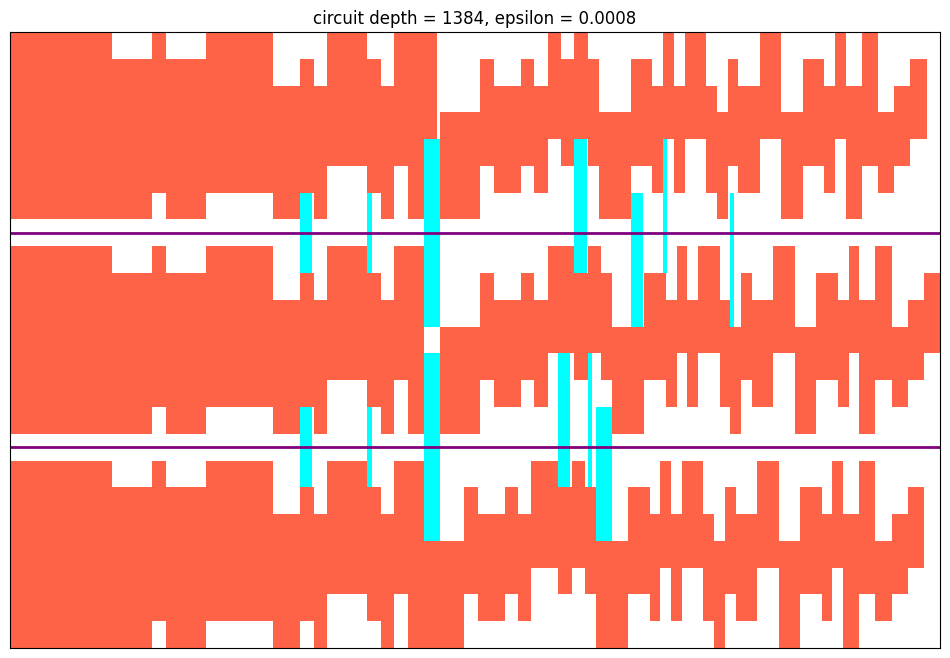

[]


In [ ]:
N = 24; f_orbs = (2,2,2,2,2,2)
epsilon = 8e-4
overlap_lst = []
seam_lst = [8,16]

uop, all_g = read_uop(1.5, 0.0, prehead)
excitations = create_excitation(uop, all_g, epsilon)

# ansatz, excitations,initial_state,hamiltonian = read_data_distance(1.5, epsilon,prehead)
excitations = orbital_reordering(excitations, f_orbs)
tiles = create_circuit_tile(excitations)
packer = TilePacker(tiles)
print("create complete")
width, height, placed_tiles, grid = packer.pack_tiles()
print(f"Bounding box size: {width} x {height}")
print("Placed tiles:", placed_tiles)
packer.draw_packing(grid,seam_lst,epsilon)
print(overlap_lst)

Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
4224
384
Construct based on unplaced tiles
create complete
Bounding box size: 1280 x 23
Placed tiles: [(0, [[10, 6, 0, 16]]), (10, [[10, 6, 0, 16]]), (20, [[10, 4, 0, 16]]), (30, [[10, 4, 0, 16]]), (40, [[8, 4, 0, 16]]), (48, [[8, 4, 0, 16]]), (56, [[14, 7, 0, 16]]), (70, [[14, 7, 0, 16]]), (84, [[14, 7, 0, 16]]), (98, [[14, 7, 0, 16]]), (112, [[10, 5, 0, 16]]), (122, [[10, 5, 0, 16]]), (132, [[10, 5, 0, 16]]), (142, [[10, 5, 0, 16]]), (152, [[10, 4, 0, 16]]), (162, [[10, 4, 0, 16]]), (172, [[8, 4, 0, 16]]), (180, [[8, 4, 0, 16]]), (188, [[10, 4, 0, 16]]), (198, [[10, 4, 0, 16]]), (208, [[8, 4, 0, 16]]), (216, [[8, 4, 0, 16]]), (224, [[10, 5, 0, 16]]), (234, [[10, 5, 0, 16]]), (244, [[10, 7, 0, 16]]), (254, [[10, 7, 0, 16]]), (264, [[10, 6, 0, 16]]), (274, [[10, 6, 0, 16]]), (284, [[10, 6, 0, 16]]), (294, [[10, 6, 0, 16]]), (304, [[10, 6, 0, 16]]), (314, [[10, 6, 0, 16]]), (324, [[8, 4, 0, 16]]), (332, [[

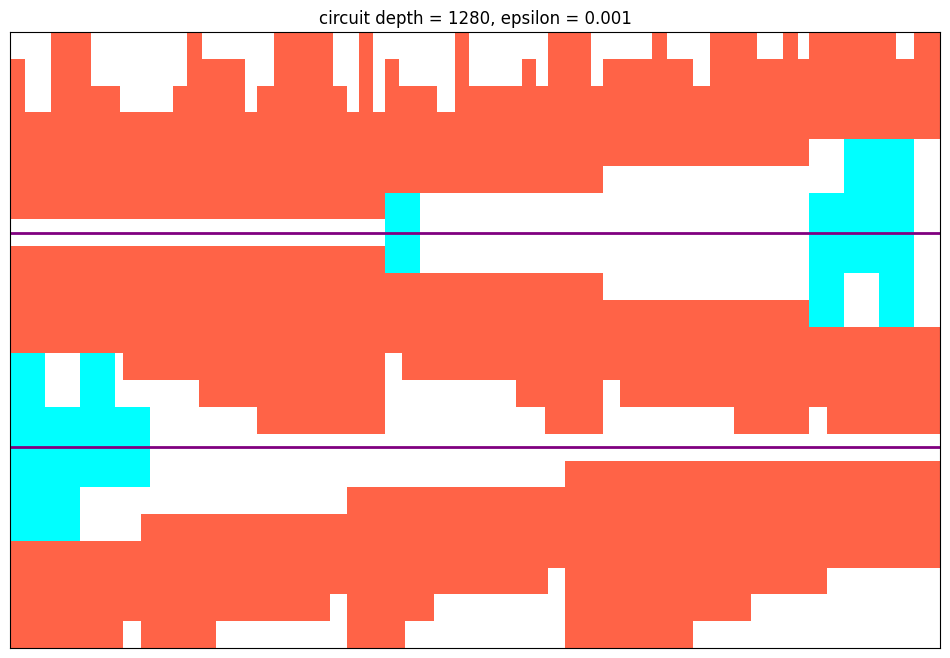

[]


In [ ]:
N = 24; f_orbs = (2,2,2,2,2,2)

ratio = 4
epsilon = 1e-3
seam_lst = [8,16]
twoCut = True

uop, all_g = read_uop(1.5, 0.0, prehead)
excitations = create_excitation(uop, all_g, epsilon)

excitations = orbital_reordering(excitations, f_orbs)
tiles = create_circuit_tile(excitations)
post_tiles = process_tiles(tiles, ratio, seam_lst)



packer = TilePacker(post_tiles, twoCut)
print("create complete")
width, height, placed_tiles, grid = packer.pack_tiles()
print(f"Bounding box size: {width} x {height}")
print("Placed tiles:", placed_tiles)
packer.draw_packing(grid,seam_lst, epsilon)
print(overlap_lst)

../data_H_12_uniform/
Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH


c:\Users\24835\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\typed\typedlist.py:87: NumbaTypeSafetyWarning: unsafe cast from int64 to uint8. Precision may be lost.
  l[i] = item


sorted
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2730
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2748
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2864
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 3054
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chai

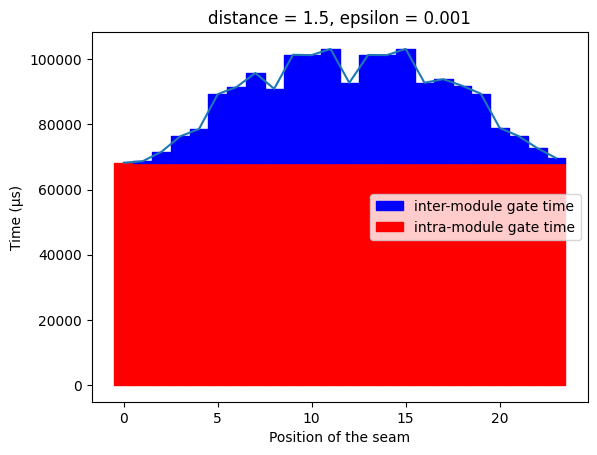

In [ ]:
N = 24
f_orbs = (2,2,2,2,2,2)
distance = 1.5
epsilon = 1e-3
print(prehead)
uop, all_g = read_uop(1.5, 0.001, prehead)
excitations = create_excitation(uop, all_g, epsilon)

excitations = to_numba_typed_list(excitations)
excitations = orbital_reordering(excitations, f_orbs)
# excitations = np.array(excitations)
excitations = excitations
time_gate_with_C(excitations, N, epsilon,ifsorted=True)
plt.title(f"distance = {distance}, epsilon = {epsilon}")
plt.show()

In [ ]:
seam_lst = [12,12]
f_orbs = (2,2,2,2,2,2)
distance = 1.5
epsilon = 3e-3
prehead = "../data_H_12_uniform/"
uop, all_g = read_uop(1.5, 0.001,prehead)
excitations = create_excitation(uop, all_g, epsilon)
print(f"excitation has length {len(excitations)}")
ratio_lst = np.linspace(1, 10, 10, dtype="int")
post_gate_lst = np.zeros(len(ratio_lst))
seam = 12
for i in range(len(ratio_lst)):
    print(f"current ratio is {ratio_lst[i]}")
    ratio = ratio_lst[i]
    excitations = create_excitation(uop, all_g, epsilon)
    tiles = create_circuit_tile(excitations)
    inter_tiles, intra_tiles = split_grid(tiles, [seam])
    inter_tiles = expand_tiles(inter_tiles, ratio)
    tiles = inter_tiles + intra_tiles
    
    bounding_width, placed_tiles = packing_with_c(tiles)
    post_gate_lst[i] = bounding_width * 25


Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
excitation has length 120
current ratio is 1
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2084
current ratio is 2
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2640
current ratio is 3
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 3196
current ratio is 4
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully 

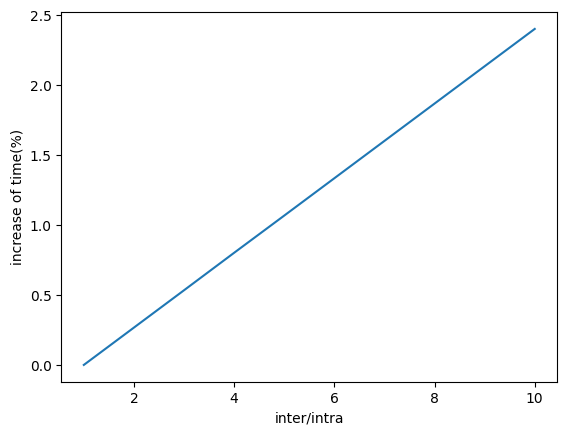

In [ ]:
post_gate_lst = np.array(post_gate_lst)
initial_gate = post_gate_lst[0]
diff = post_gate_lst - initial_gate
plt.plot(ratio_lst, diff/initial_gate)
plt.xlabel("inter/intra")
plt.ylabel("increase of time(%)")
post_gate_lst.tolist()
ratio_lst.tolist()
initial_gate.tolist()
result = [ratio_lst, post_gate_lst]
np.save(f"../H_12_transition/inter_transition_uniform/epsilon = {epsilon}.npy", result)

In [ ]:
print(1)

[0.1 1.1 2.1 3.1 4.1 5.1 6.1 7.1 8.1 9.1]


Text(0.5, 1.0, 'original algorithm')

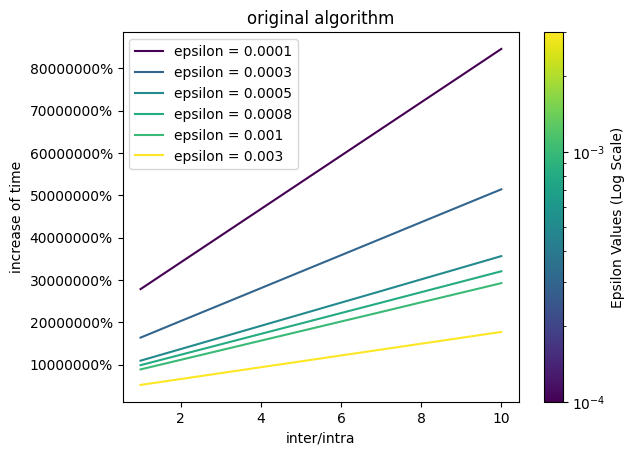

In [ ]:

from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]

epsilon_lst = [1e-4, 3e-4, 5e-4, 8e-4, 1e-3, 3e-3]

# Normalize epsilon values for color mapping
norm = mcolors.LogNorm(vmin=min(epsilon_lst), vmax=max(epsilon_lst))
cmap = plt.cm.viridis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessary for ScalarMappable without data
# Create figure and axis
fig, ax = plt.subplots()

for epsilon in epsilon_lst:
    result = np.load(f"../H_12_transition/inter_transition_uniform/epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate = post_gate_lst1[0]
    diff = post_gate_lst1 - initial_gate
    color = cmap(norm(epsilon))
    plt.plot(ratio_lst1, diff/initial_gate, label = f"epsilon = {epsilon}",color=color)
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.legend()
# Add colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Epsilon Values (Log Scale)')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("original algorithm")

[0.1 1.1 2.1 3.1 4.1 5.1 6.1 7.1 8.1 9.1]


Text(0.5, 1.0, 'Number of gates')

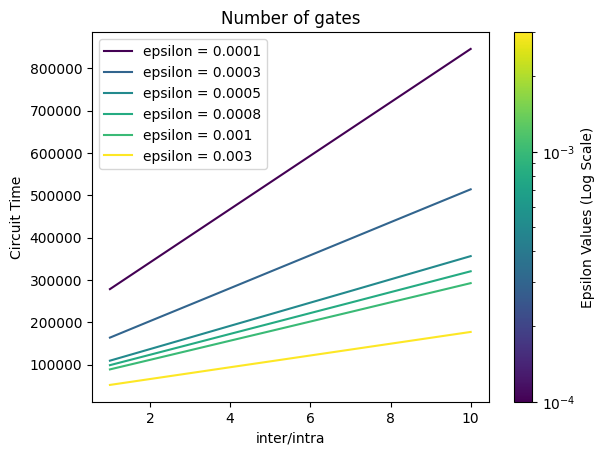

In [ ]:

from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]

epsilon_lst = [1e-4, 3e-4, 5e-4, 8e-4, 1e-3, 3e-3]

# Normalize epsilon values for color mapping
norm = mcolors.LogNorm(vmin=min(epsilon_lst), vmax=max(epsilon_lst))
cmap = plt.cm.viridis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessary for ScalarMappable without data
# Create figure and axis
fig, ax = plt.subplots()

for epsilon in epsilon_lst:
    result = np.load(f"../H_12_transition/inter_transition_uniform/epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate = post_gate_lst1[0]
    diff = post_gate_lst1 - initial_gate
    color = cmap(norm(epsilon))
    plt.plot(ratio_lst1, post_gate_lst1, label = f"epsilon = {epsilon}",color=color)
    plt.xlabel("inter/intra")
    plt.ylabel("Circuit Time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.legend()
# Add colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Epsilon Values (Log Scale)')

plt.title("Number of gates")

[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1]
[225550. 257100. 288550. 320200. 352050. 383300. 414950. 450600. 484150.
 517850. 555450. 589650. 623400. 654750. 689300. 722800. 758850. 790550.
 824000. 859500.]
[224450. 257800. 289550. 321650. 352900. 383900. 414100. 445050. 475200.
 506550. 540350. 574150. 603250. 637050. 667350. 700050. 734100. 766450.
 799550. 832400.]


Text(0.5, 1.0, 'original algorithm')

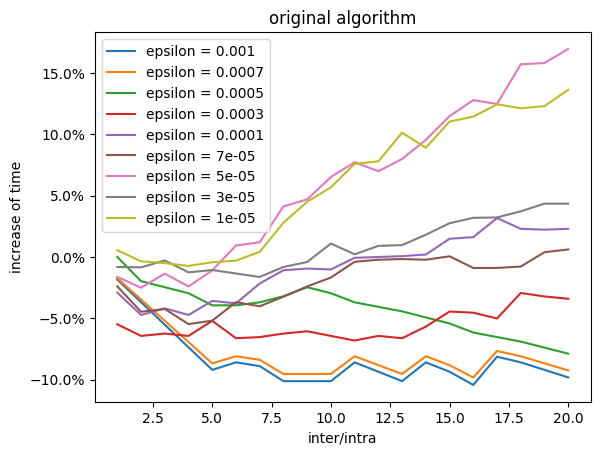

In [ ]:
from matplotlib.ticker import PercentFormatter
# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]
epsilon_lst = [0.001,0.0007, 0.0005, 0.0003,0.0001, 0.00007, 0.00005, 0.00003,1e-5]
for epsilon in epsilon_lst:
    result = np.load(f"../H_12_transition/inter_transition_2_cut/epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff1 = post_gate_lst1 - initial_gate_lst1

    result2 = np.load(f"../H_12_transition/inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy")
    ratio_lst2 = result2[0]
    post_gate_lst2 = result2[1]
    initial_gate_lst2 = result2[2]
    diff2 = post_gate_lst2 - initial_gate_lst2
    diff = post_gate_lst2 - post_gate_lst1
    plt.plot(ratio_lst1, diff/(initial_gate_lst1[0]), label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.legend()
print(post_gate_lst2)
print(post_gate_lst1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("original algorithm")

In [ ]:
seam_lst = [8,16]
distance = 1.5
epsilon = 0.001
read_epsilon = 1.0
prehead ="C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/H_12_cluster/"
uop, all_g = read_uop(distance, read_epsilon, prehead)
excitations = create_excitation(uop, all_g, epsilon)
f_orbs = (2,2,2,2,2,2)
excitations = orbital_reordering(excitations, f_orbs)
tiles = create_circuit_tile(excitations)
initial_packer = TilePacker(tiles)
ratio_lst1 = np.arange(1,4,0.5)
ratio_lst = np.linspace(4, 20, 17)
ratio_lst = np.concatenate((ratio_lst1, ratio_lst))
print(ratio_lst)

initial_gate_lst = np.zeros(np.size(ratio_lst))
post_gate_lst = np.zeros(np.size(ratio_lst))
initial_gates, _, _, initial_grid = initial_packer.pack_tiles()
initial_time = initial_gates * 25
print("initialization complete")

print(seam_lst)
results = Parallel(n_jobs=-1, backend='threading')(delayed(process_ratio)(
    k, ratio_lst, tiles, seam_lst, initial_time, twocut=True) for k in range(len(ratio_lst)))

# Unpack results
for k, (initial_time, post_time) in enumerate(results):
    initial_gate_lst[k] = initial_time
    post_gate_lst[k] = post_time

Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
Construct based on unplaced tiles
[ 1.   1.5  2.   2.5  3.   3.5  4.   5.   6.   7.   8.   9.  10.  11.
 12.  13.  14.  15.  16.  17.  18.  19.  20. ]
initialization complete
[8, 16]


NameError: name 'process_ratio' is not defined

In [ ]:
post_gate_lst = np.array(post_gate_lst)
initial_gate_lst = np.array(initial_gate_lst)
diff = post_gate_lst - initial_gate_lst
plt.plot(ratio_lst, diff/initial_gate_lst[0])
plt.xlabel("inter/intra")
plt.ylabel("increase of time(%)")
post_gate_lst.tolist()
ratio_lst.tolist()
initial_gate_lst.tolist()
result = [ratio_lst, post_gate_lst, initial_gate_lst]
np.save(f"inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy", result)

NameError: name 'post_gate_lst' is not defined

In [ ]:
epsilon = 0.001
filename_lst = [f"inter_transition_2_cut/epsilon = {epsilon}.npy", f"inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy"]
for filename in filename_lst:
    result = np.load(filename)
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    plt.plot(ratio_lst1, diff/initial_gate_lst1[0], label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")

plt.legend(["normal packing", "improved packing"])

FileNotFoundError: [Errno 2] No such file or directory: 'inter_transition_2_cut/epsilon = 0.001.npy'

[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1]


Text(0.5, 1.0, '$(H_2)_6$ chain UCC circuit time')

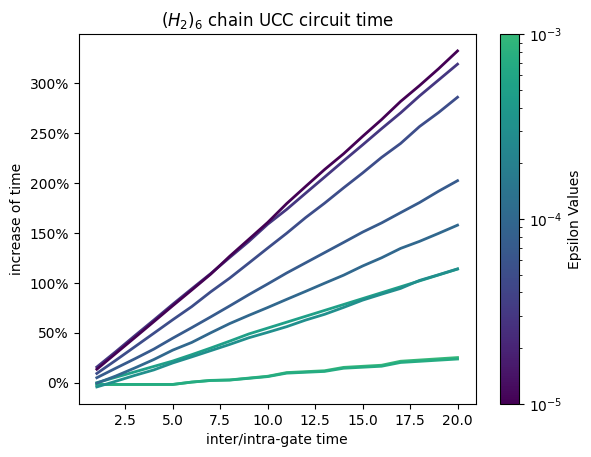

In [ ]:
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors

# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]

epsilon_lst = [0.001,0.0007, 0.0005, 0.0003,0.0001, 0.00007, 0.00005, 0.00003,1e-5]

# Normalize epsilon values for color mapping
norm = mcolors.LogNorm(vmin=min(epsilon_lst), vmax=max(epsilon_lst)*10)
cmap = plt.cm.viridis

# Create figure and axis
fig, ax = plt.subplots()

for epsilon in epsilon_lst:
    result = np.load(f"../H_12_transition/inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    color = cmap(norm(epsilon))
    plt.plot(ratio_lst1, diff/initial_gate_lst1[0], label = f"epsilon = {epsilon}",color=color, linewidth = 2)
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
# plt.legend()
# Add colorbar
plt.rcParams.update({'font.size': 10})
plt.xlabel("inter/intra-gate time")
plt.ylabel("increase of time")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar to work
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Epsilon Values')
cbar.ax.set_ylim(min(epsilon_lst), max(epsilon_lst))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(r"$(H_2)_6$ chain UCC circuit time")
# plt.show()

Axes(0.125,0.11;0.62x0.77)
[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1]


Text(0.5, 0, 'inter/intra-gate time')

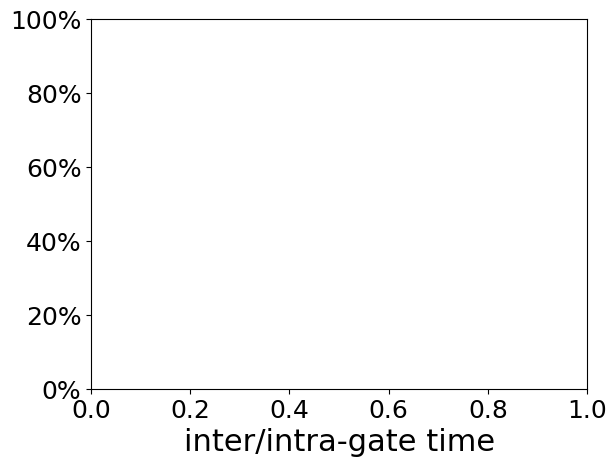

In [ ]:
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]

epsilon_lst = [0.001,0.0007, 0.0005, 0.0003,0.0001, 0.00007, 0.00005, 0.00003,1e-5]

# Normalize epsilon values for color mapping
norm = mcolors.LogNorm(vmin=min(epsilon_lst), vmax=max(epsilon_lst)*10)
cmap = plt.cm.viridis
# Create figure and axis
inset_ax = inset_axes(ax, width="30%", height="30%", loc='upper left')
for i in range(2):
    epsilon = epsilon_lst[i]
    result = np.load(f"../H_12_transition/inter_transition_2_cut/enhanced_epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    color = cmap(norm(epsilon))
    inset_ax.plot(ratio_lst1[:10], diff[:10]/initial_gate_lst1[0], label = f"epsilon = {epsilon}",color=color,linewidth = 2)

ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
# plt.legend()
# Add colorbar
# cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Epsilon Values (Log Scale)')
# plt.xlabel("inter/intra")
# plt.ylabel("increase of time")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.rcParams.update({'font.size': 18})
plt.xlabel("inter/intra-gate time",fontsize=22)

# plt.title("original algorithm")

<Figure size 1920x1440 with 0 Axes>

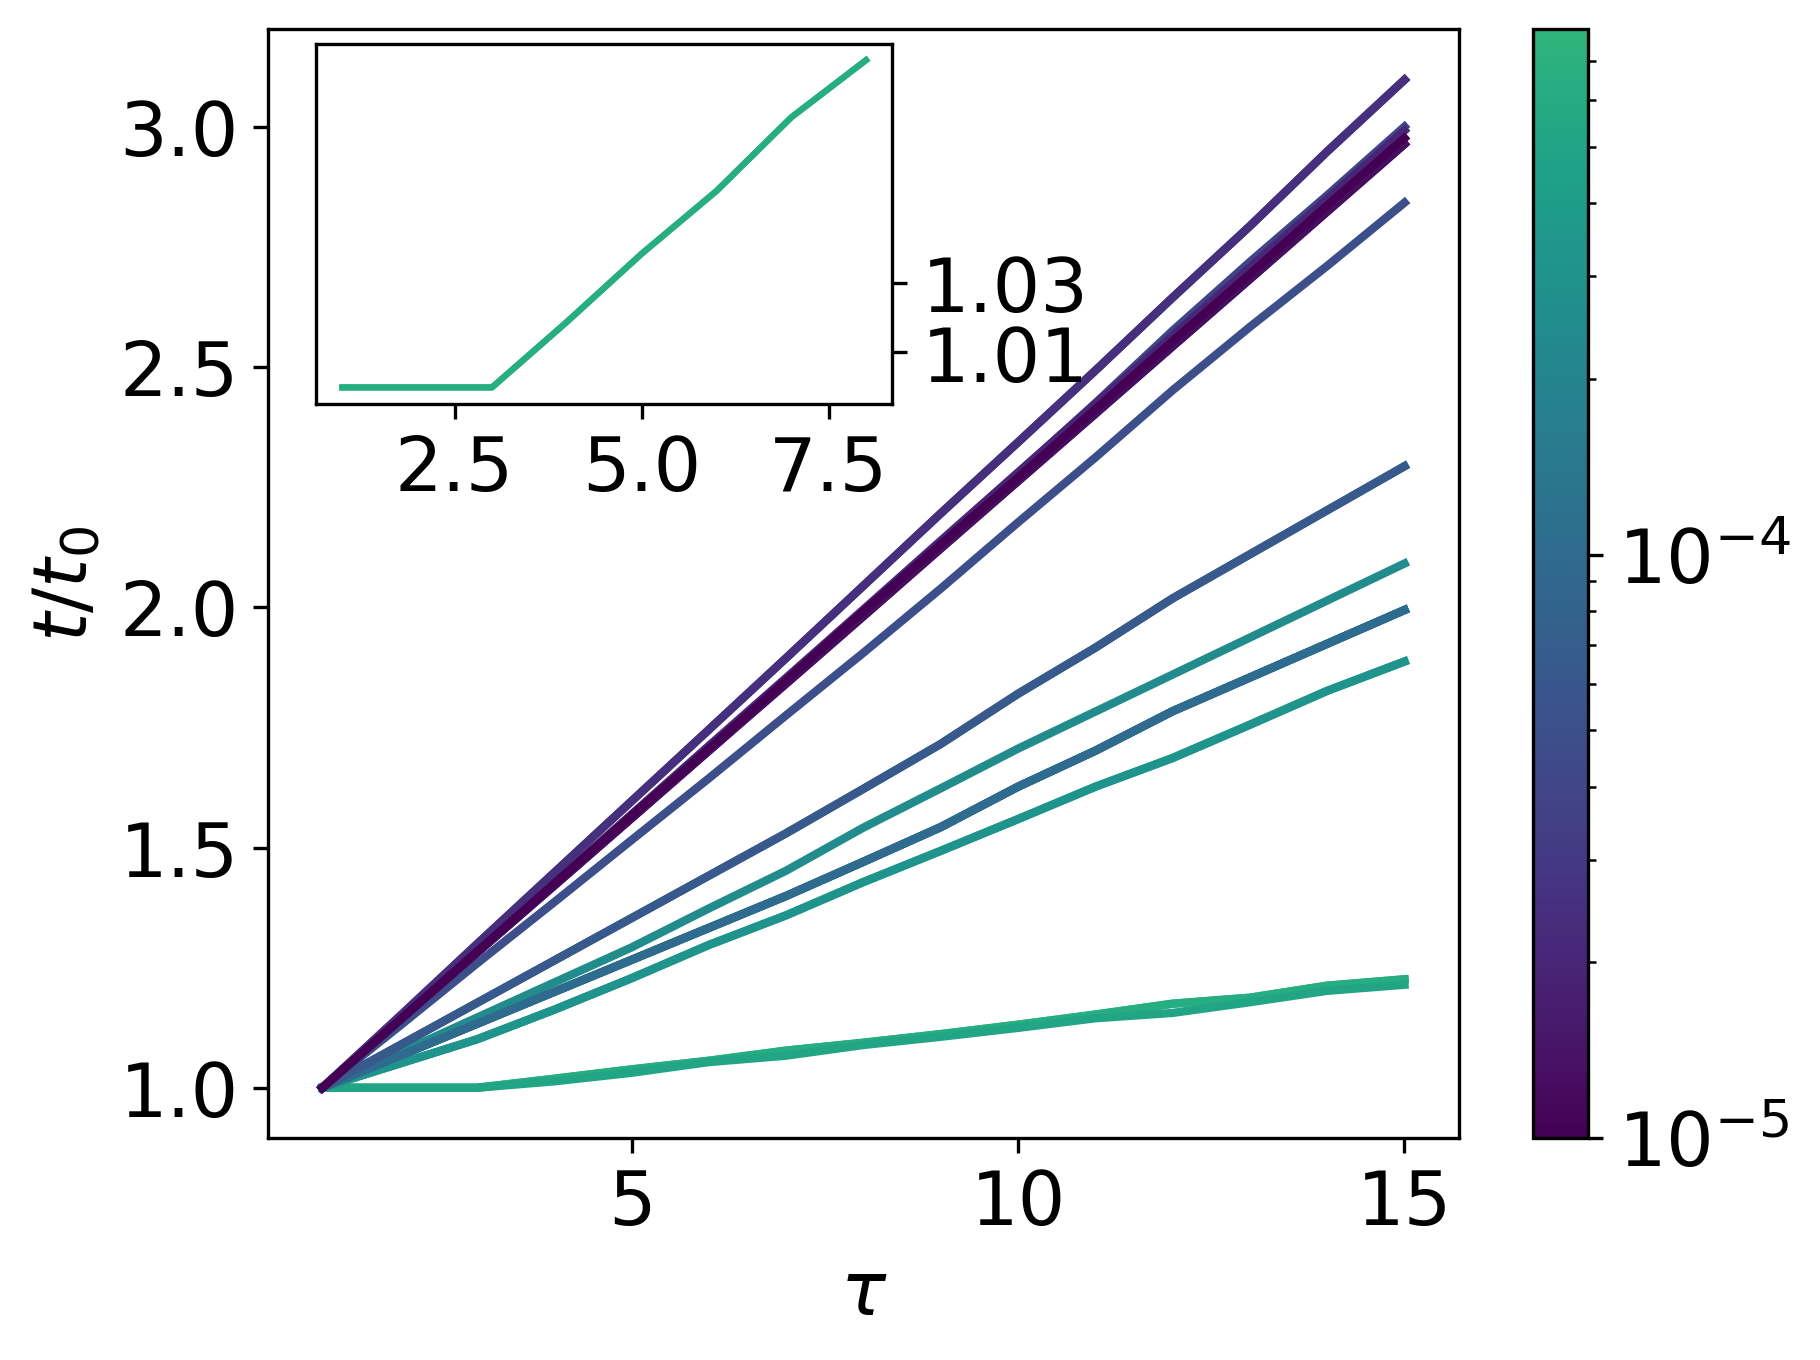

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

plt.figure(dpi=300)  # Default is 100
# epsilon_lst values
epsilon_lst1 = np.linspace(3.1,3.9,9)
epsilon_lst = np.linspace(4,5.0,11)
epsilon_lst = np.concatenate([epsilon_lst1, epsilon_lst])
epsilon_lst = 10**-(epsilon_lst)
distance = 3.0
# epsilon_lst[0] = 8e-4
# epsilon_lst[1] = 6e-4
plt.rcParams.update({'font.size': 18})
# Normalize epsilon values for color mapping
norm = mcolors.LogNorm(vmin=min(epsilon_lst), vmax=max(epsilon_lst) * 10)
cmap = plt.cm.viridis

# Create main figure and axis
fig, ax = plt.subplots(dpi=300)

# Plot for the main plot
for epsilon in epsilon_lst:
    result = np.load(f"../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = post_gate_lst1[0]
    diff = post_gate_lst1 - initial_gate_lst1
    color = cmap(norm(epsilon))
    ax.plot(ratio_lst1, post_gate_lst1 / initial_gate_lst1, label=f"epsilon = {epsilon}", color=color, linewidth=2)

# Axis labels and title for main plot
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$t/t_0$")
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Manually create the inset axes
inset_ax = plt.axes([0.15, 0.62, 0.3, 0.25])  # [left, bottom, width, height]

# Plot for inset plot (first 2 epsilon values)
for i in range(2):
    plt.rcParams.update({'font.size': 10})
    epsilon = epsilon_lst[i]
    result = np.load(f"../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = post_gate_lst1[0]
    diff = post_gate_lst1 - initial_gate_lst1
    color = cmap(norm(epsilon))
    inset_ax.plot(ratio_lst1[:8], post_gate_lst1[:8] / initial_gate_lst1, label=f"epsilon = {epsilon}", color=color, linewidth=1.5)
inset_ax.yaxis.set_ticks_position('right')
inset_ax.set_yticks([1.01, 1.03])
plt.tick_params(axis='y', labelsize=18)


plt.rcParams.update({'font.size': 18})
# Colorbar setup for main plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar to work
cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Epsilon Values')
cbar.ax.set_ylim(min(epsilon_lst), max(epsilon_lst))  # Set colorbar limits
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Final adjustments and showing the plot
  # Update font size
plt.show()
plt.savefig('Fig3a.png')  # or 'figure.pdf'


[0.1 1.1 2.1 3.1 4.1 5.1 6.1 7.1 8.1 9.1]


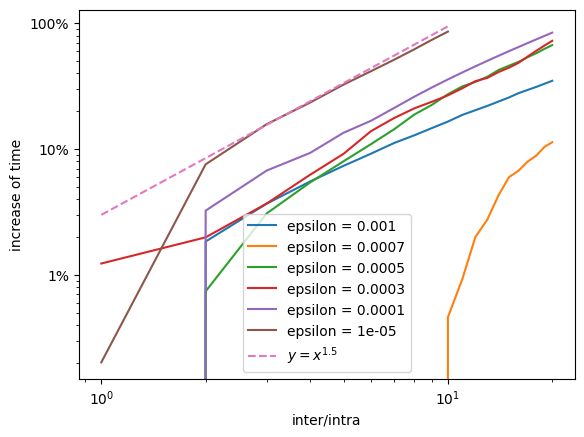

In [ ]:
from matplotlib.ticker import PercentFormatter
epsilon_lst = [0.001,0.0007,0.0005, 0.0003 ,0.0001,0.00001]
for epsilon in epsilon_lst:
    result = np.load(f"inter_transition_1_cut/epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = result[2]
    diff = post_gate_lst1 - initial_gate_lst1
    plt.loglog(ratio_lst1, diff/initial_gate_lst1[0], label = f"epsilon = {epsilon}")
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time")
ratio_lst1 = np.array(ratio_lst1)
print(ratio_lst1-0.9)
plt.loglog(ratio_lst1, ratio_lst1**1.5*0.03, "--", label = r"$y=x^{1.5}$")
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 

cur epsilon is 0.001
Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
excitation has length 144
15
current ratio is 1.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2560
current ratio is 2.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2560
current ratio is 3.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2560
current ratio is 4.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem

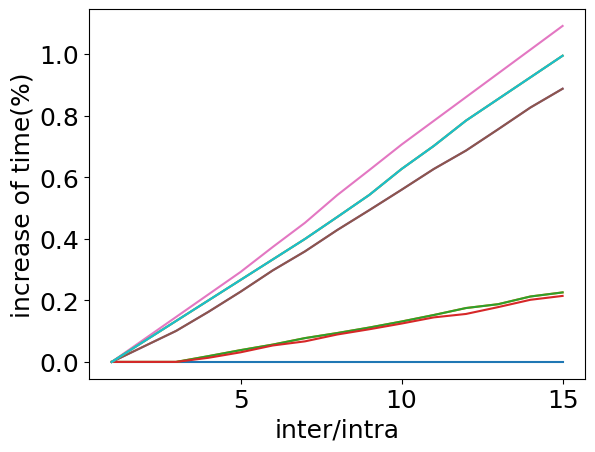

In [22]:
seam_lst = [8,16]
f_orbs = (2,2,2,2,2,2)
read_epsilon = 1.0
distance = 3.0
read_epsilon = 1.0
epsilon_lst = np.linspace(3.0,3.9,10)
epsilon_lst = 10**-(epsilon_lst)
ratio_lst1 = np.arange(1,4,0.5)
ratio_lst = np.linspace(4, 10, 7)
ratio_lst = np.concatenate((ratio_lst1, ratio_lst))
ratio_lst = np.linspace(1, 15, 15)

path = f"../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {read_epsilon}.npy"
directory = os.path.dirname(path)
os.makedirs(directory, exist_ok=True)
c_directory = "../src/lib/tile_packing.exe"
for epsilon in epsilon_lst:
    print(f"cur epsilon is {epsilon}")
    prehead = "../H_12_cluster/"
    uop, all_g = read_uop(distance, read_epsilon, prehead)

    # inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=True)
    excitations = create_excitation(uop, all_g, epsilon)
    print(f"excitation has length {len(excitations)}")
    post_gate_lst = np.zeros(len(ratio_lst))
    print(len(ratio_lst))
    for i in range(len(ratio_lst)):
        print(f"current ratio is {ratio_lst[i]}")
        ratio = ratio_lst[i]
        excitations = create_excitation(uop, all_g, epsilon)
        excitations = orbital_reordering(excitations, f_orbs)
        tiles = create_circuit_tile(excitations)
        tiles = process_tiles(tiles, ratio, seam_lst)
        bounding_width, placed_tiles = packing_with_c(tiles, c_directory)
        post_gate_lst[i] = bounding_width * 25
    post_gate_lst = np.array(post_gate_lst)
    initial_gate = post_gate_lst[0]
    diff = post_gate_lst - initial_gate
    plt.plot(ratio_lst, diff/initial_gate)
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time(%)")
    post_gate_lst.tolist()
    ratio_lst.tolist()
    initial_gate.tolist()
    result = [ratio_lst, post_gate_lst]
    
    np.save(f"../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {epsilon}.npy", result)

In [23]:
seam_lst = [8,16]
f_orbs = (2,2,2,2,2,2)
read_epsilon = 1.0
distance = 3.0
read_epsilon = 1.0
epsilon_lst = np.linspace(3.0,5.0,21)
epsilon_lst = 10**-(epsilon_lst)
ratio_lst1 = np.arange(1,4,0.5)
ratio_lst = np.linspace(4, 10, 7)
ratio_lst = np.concatenate((ratio_lst1, ratio_lst))
ratio_lst = np.linspace(1, 15, 15)

path = f"../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {read_epsilon}.npy"
directory = os.path.dirname(path)
os.makedirs(directory, exist_ok=True)
c_directory = "../src/lib/tile_packing.exe"
for epsilon in epsilon_lst:
    print(f"cur epsilon is {epsilon}")
    prehead = "../H_12_cluster/"
    uop, all_g = read_uop(distance, read_epsilon, prehead)

    # inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=True)
    excitations = create_excitation(uop, all_g, epsilon)
    print(f"excitation has length {len(excitations)}")
    post_gate_lst = np.zeros(len(ratio_lst))
    print(len(ratio_lst))
    for i in range(len(ratio_lst)):
        print(f"current ratio is {ratio_lst[i]}")
        ratio = ratio_lst[i]
        excitations = create_excitation(uop, all_g, epsilon)
        excitations = orbital_reordering(excitations, f_orbs)
        tiles = create_circuit_tile(excitations)
        tiles = process_tiles(tiles, ratio, seam_lst)
        bounding_width, placed_tiles = packing_with_c(tiles, c_directory)
        post_gate_lst[i] = bounding_width * 25
    post_gate_lst = np.array(post_gate_lst)
    initial_gate = post_gate_lst[0]
    diff = post_gate_lst - initial_gate
    plt.plot(ratio_lst, diff/initial_gate)
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time(%)")
    post_gate_lst.tolist()
    ratio_lst.tolist()
    initial_gate.tolist()
    result = [ratio_lst, post_gate_lst]
    
    np.save(f"../H_12_transition/initial/inter_transition_{distance+1}/enhanced_epsilon = {epsilon}.npy", result)

cur epsilon is 0.001
Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
excitation has length 144
15
current ratio is 1.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2560
current ratio is 2.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2560
current ratio is 3.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 2560
current ratio is 4.0
7680
0
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem

KeyboardInterrupt: 

In [27]:
ratio_lst1 = np.arange(1,4,0.5)
ratio_lst = np.linspace(4, 10, 7)
ratio_lst = np.concatenate((ratio_lst1, ratio_lst))
distance = 2.0
epsilon_lst = np.linspace(3,4,11)
epsilon_lst = 10**-(epsilon_lst)
if distance == 3.0:
    epsilon_lst[0] = 8e-4
    epsilon_lst[1] = 6e-4
data = np.zeros([len(epsilon_lst), len(ratio_lst)])
for i in range(len(epsilon_lst)):
    epsilon = epsilon_lst[i]
    result = np.load(f"../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {epsilon}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate = post_gate_lst1[0]
    for j in range(len(ratio_lst)):
        data[i,j] = post_gate_lst1[j]/initial_gate


In [28]:
threshold = np.zeros(len(epsilon_lst))
threshold2 = np.zeros(len(epsilon_lst))
for i in range(len(threshold)):
    for j in range(len(ratio_lst)):
        if (data[i, j] - 1) == 0 and (data[i, j+1] - 1) >0:
            threshold[i] = ratio_lst[j]
        if (data[i, j] - 1) <= 0.1 and (data[i, j+1] - 1) >0.1:
            threshold2[i] = ratio_lst[j]

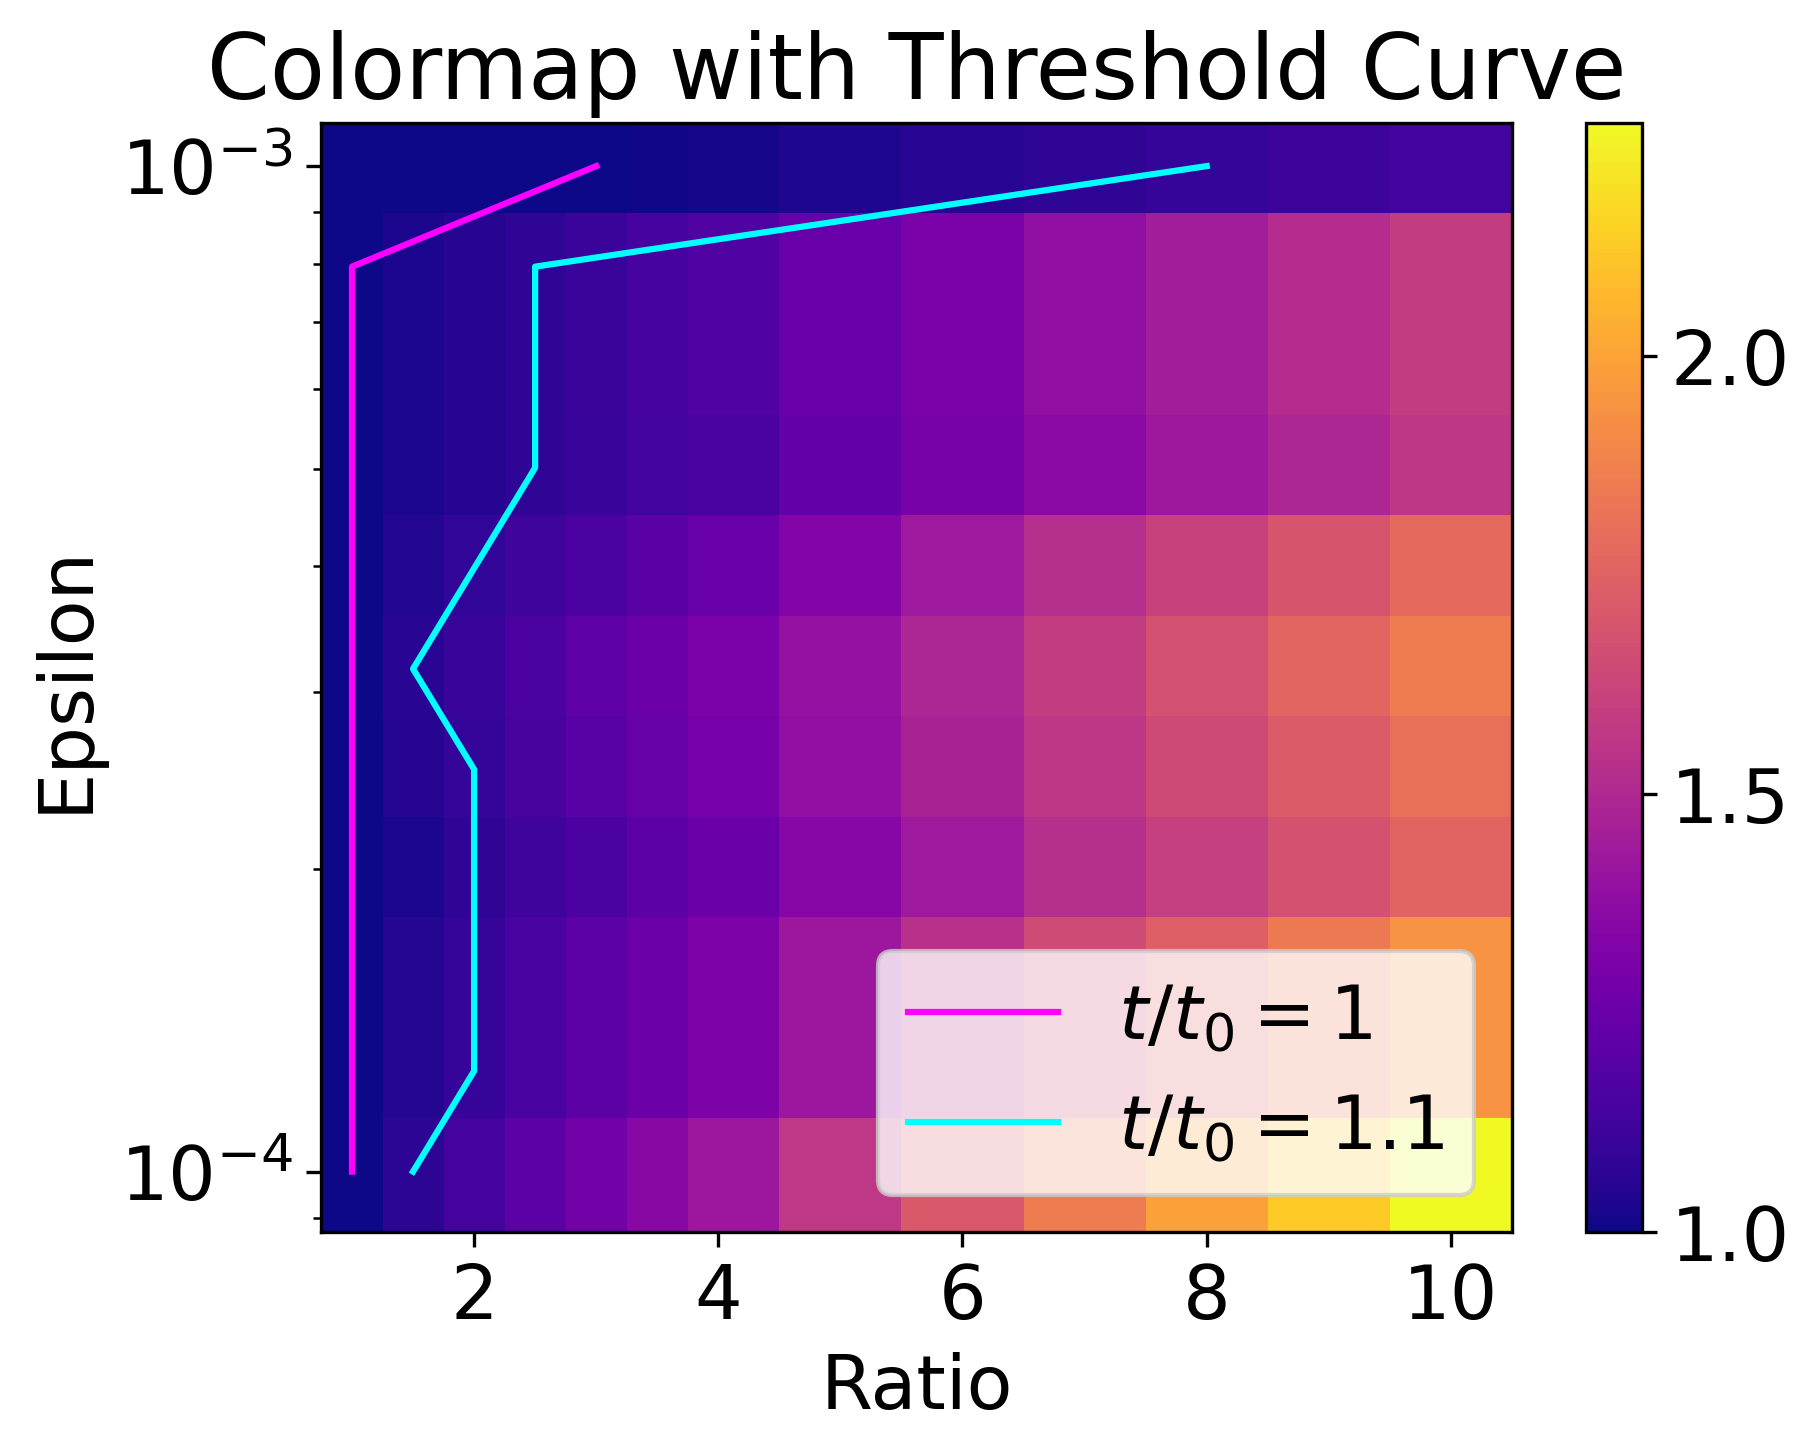

[[1.         1.         1.         1.         1.         1.00859375
  1.01875    1.03828125 1.05625    1.07734375 1.09375    1.11171875
  1.13125   ]
 [1.         1.02631579 1.05263158 1.07894737 1.10526316 1.13881579
  1.17368421 1.24276316 1.31052632 1.38092105 1.44736842 1.51513158
  1.58421053]
 [1.         1.02631579 1.05263158 1.07894737 1.10526316 1.13881579
  1.17368421 1.24276316 1.31052632 1.38092105 1.44736842 1.51513158
  1.58421053]
 [1.         1.02518892 1.05037783 1.07556675 1.10075567 1.13287154
  1.16246851 1.2279597  1.29722922 1.35894207 1.42821159 1.49307305
  1.55919395]
 [1.         1.04044944 1.08089888 1.12134831 1.16179775 1.20224719
  1.24269663 1.33932584 1.43146067 1.5258427  1.61123596 1.69662921
  1.78202247]
 [1.         1.05534455 1.10363538 1.15897992 1.21269669 1.25908844
  1.30330982 1.39880629 1.48670646 1.5849159  1.67661422 1.76451438
  1.85675529]
 [1.         1.05042649 1.0938284  1.14576016 1.1956849  1.24034119
  1.29252383 1.38835926 1.474159

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(dpi=300)

# Create meshgrid
x, y = np.meshgrid(ratio_lst, epsilon_lst)

# Plot colormap
c = ax.pcolormesh(x, y, data, cmap='plasma', shading='auto')
ax.set_yscale('log')

# Add colorbar
cb = fig.colorbar(c, ax=ax)
cb.set_ticks([1, 1.5, 2])

# Plot curve: threshold is an array of same length as epsilon_lst
# So we treat epsilon_lst as y-axis, threshold as x-values
ax.plot(threshold, epsilon_lst, color='fuchsia', label=r'$t/t_0 = 1$')
ax.plot(threshold2, epsilon_lst, color='cyan', label='$t/t_0 = 1.1$')


# Labels and title
ax.set_xlabel('Ratio')
ax.set_ylabel('Epsilon')
ax.set_title('Colormap with Threshold Curve')
ax.legend()

plt.show()
print(data)

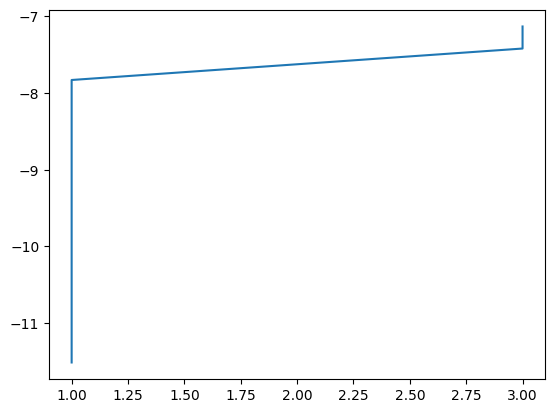

In [24]:
plt.plot(threshold, np.log(epsilon_lst))
